In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw

c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
global_job_kwargs = dict(n_jobs=4, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

In [3]:
binary_path = r"C:\Users\tanaka-users\myKilosort\ZFM-02370_mini.imec0.ap\ZFM-02370_mini.imec0.ap.bin"
recording = se.read_binary(file_paths=binary_path, sampling_frequency=30000, num_channels=385, dtype='int16')
print(recording)
# print(sorting_true)
recording = recording.remove_channels([191])

BinaryRecordingExtractor: 385 channels - 30.0kHz - 1 segments - 2,700,000 samples 
                          90.00s (1.50 minutes) - int16 dtype - 1.94 GiB
  file_paths: ['C:\\Users\\tanaka-users\\myKilosort\\ZFM-02370_mini.imec0.ap\\ZFM-02370_mini.imec0.ap.bin']


In [4]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print("Channel ids:", channel_ids)
print("Sampling frequency:", fs)
print("Number of channels:", num_chan)
print("Number of segments:", num_seg)

Channel ids: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

Probe - 24ch - 1shanks
       x      y contact_shapes  radius shank_ids contact_ids
0    0.0    0.0         circle     5.0                      
1    0.0   20.0         circle     5.0                      
2    0.0   40.0         circle     5.0                      
3    0.0   60.0         circle     5.0                      
4    0.0   80.0         circle     5.0                      
5    0.0  100.0         circle     5.0                      
6    0.0  120.0         circle     5.0                      
7    0.0  140.0         circle     5.0                      
8   20.0  -10.0         circle     5.0                      
9   20.0   10.0         circle     5.0                      
10  20.0   30.0         circle     5.0                      
11  20.0   50.0         circle     5.0                      
12  20.0   70.0         circle     5.0                      
13  20.0   90.0         circle     5.0                      
14  20.0  110.0         circle     5.0                      
1

(<mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x15d131474a0>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x15d12d24260>)

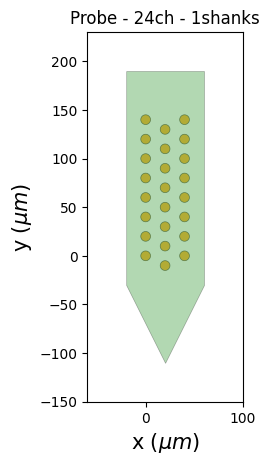

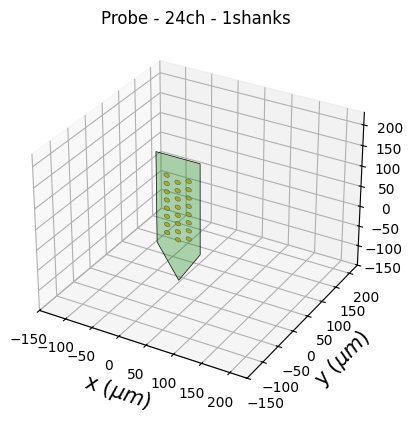

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from probeinterface import Probe
from probeinterface.plotting import plot_probe

n = 24
positions = np.zeros((n, 2))
for i in range(n):
    x = i // 8
    y = i % 8
    positions[i] = x, y
positions *= 20
positions[8:16, 1] -= 10

probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 5})
print(probe)

# プローブの形状 緑色の部分の設定
polygon = [(-20, -30), (20, -110), (60, -30), (60, 190), (-20, 190)]
probe.set_planar_contour(polygon)

df = probe.to_dataframe()
print(df)
plot_probe(probe)

probe_3d = probe.to_3d(axes="xz")
plot_probe(probe_3d)

[  2   6  10  14  18  22  26  30  34  38  42  46  50  54  58  62  66  70
  74  78  82  86  90  94  98 102 106 110 114 118 122 126 130 134 138 142
 146 150 154 158 162 166 170 174 178 182 186 190 194 198 202 206 210 214
 218 222 226 230 234 238 242 246 250 254 258 262 266 270 274 278 282 286
 290 294 298 302 306 310 314 318 322 326 330 334 338 342 346 350 354 358
 362 366 370 374 378 382   0   4   8  12  16  20  24  28  32  36  40  44
  48  52  56  60  64  68  72  76  80  84  88  92  96 100 104 108 112 116
 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188
 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 256 260
 264 268 272 276 280 284 288 292 296 300 304 308 312 316 320 324 328 332
 336 340 344 348 352 356 360 364 368 372 376 380   3   7  11  15  19  23
  27  31  35  39  43  47  51  55  59  63  67  71  75  79  83  87  91  95
  99 103 107 111 115 119 123 127 131 135 139 143 147 151 155 159 163 167
 171 175 179 183 187 191 195 199 203 207 211 215 21

(0.0, 100.0)

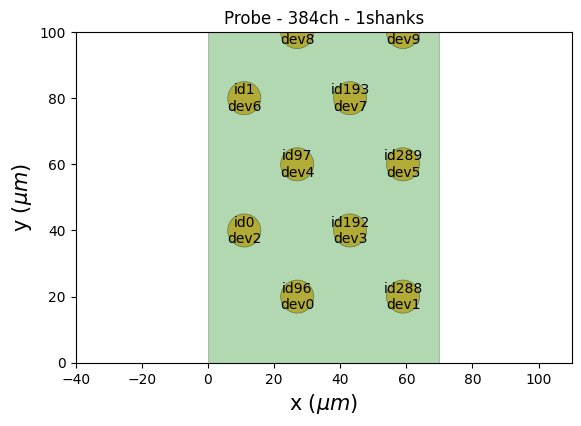

In [6]:
# generate_multi_columns_probe()でいいかも
import numpy as np
n = 384
positions = np.zeros((n, 2))
contact_ids = np.arange(n)
device_ids = np.concatenate([np.arange(2,383,4), 
               np.arange(0,381,4), 
               np.arange(3,384,4), 
               np.arange(1, 382,4)]).flatten()
print(device_ids)
for i in range(n):
    x = i // 96
    y = i % 96
    positions[i] = x, y
positions[:,0] *= 16
positions[:,0] += 11
positions[:,1] *= 40
positions[:,1] += 20

positions[0:96,1] += 20
positions[192:288,1] += 20


probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 5}, contact_ids=contact_ids)
print(probe)

probe.set_device_channel_indices(device_ids)

# プローブの形状 緑色の部分の設定
xlim = [0, 70]
ylim = [0, 3900]
polygon = [(xlim[0], ylim[0]), (xlim[1], ylim[0]), (xlim[1], ylim[1]), (xlim[0], ylim[1])]
probe.set_planar_contour(polygon)

df = probe.to_dataframe()
fig, ax = plt.subplots()
plot_probe(probe, ax=ax, with_contact_id=True, with_device_index=True)
ax.set_ylim(0,100)

In [7]:
# num_seg = recording.get_num_segments()
# unit_ids = sorting_true.get_unit_ids()
# spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

# print("Number of segments:", num_seg)
# print("Unit ids:", unit_ids)
# print("Spike train of first unit:", spike_train)

In [8]:
# probe = recording.get_probe()
# print(probe)

# from probeinterface.plotting import plot_probe

# _ = plot_probe(probe)

In [9]:
recording = recording.set_probe(probe)
recording_cmr = recording
recording_f = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
print(recording_f)
recording_cmr = spre.common_reference(recording_f, reference="global", operator="median")
print(recording_cmr)

# this computes and saves the recording after applying the preprocessing chain
recording_preprocessed = recording_cmr.save(format="binary")
print(recording_preprocessed)

BandpassFilterRecording: 384 channels - 30.0kHz - 1 segments - 2,700,000 samples 
                         90.00s (1.50 minutes) - int16 dtype - 1.93 GiB
CommonReferenceRecording: 384 channels - 30.0kHz - 1 segments - 2,700,000 samples 
                          90.00s (1.50 minutes) - int16 dtype - 1.93 GiB
Use cache_folder=C:\Users\TANAKA~1\AppData\Local\Temp\spikeinterface_cache\tmpykv5mvuw\0NLWY78O
write_binary_recording 
engine=process - n_jobs=4 - samples_per_chunk=30,000 - chunk_memory=21.97 MiB - total_memory=87.89 MiB - chunk_duration=1.00s


write_binary_recording (workers: 4 processes): 100%|██████████| 90/90 [00:35<00:00,  2.57it/s]


BinaryFolderRecording: 384 channels - 30.0kHz - 1 segments - 2,700,000 samples 
                       90.00s (1.50 minutes) - int16 dtype - 1.93 GiB


In [10]:
print("Available sorters", ss.available_sorters())
print("Installed sorters", ss.installed_sorters())

Available sorters ['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'kilosort4', 'mountainsort4', 'mountainsort5', 'pykilosort', 'rtsort', 'simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']
Installed sorters ['kilosort4', 'simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2']


In [11]:
# print("Tridesclous params:")
# pprint(ss.get_default_sorter_params("tridesclous"))
# print("SpykingCircus2 params:")
# pprint(ss.get_default_sorter_params("spykingcircus2"))
# print("simple params:")
# pprint(ss.get_default_sorter_params("simple"))
print("kilosort4 params:")
pprint(ss.get_default_sorter_params("kilosort4"))


kilosort4 params:
{'Th_learned': 8,
 'Th_single_ch': 6,
 'Th_universal': 9,
 'acg_threshold': 0.2,
 'artifact_threshold': inf,
 'bad_channels': None,
 'batch_size': 60000,
 'binning_depth': 5,
 'ccg_threshold': 0.25,
 'chunk_duration': '1s',
 'clear_cache': False,
 'cluster_downsampling': 1,
 'cluster_neighbors': 10,
 'delete_recording_dat': True,
 'dmin': None,
 'dminx': 32,
 'do_CAR': True,
 'do_correction': True,
 'drift_smoothing': [0.5, 0.5, 0.5],
 'duplicate_spike_ms': 0.25,
 'fs': 30000,
 'highpass_cutoff': 300,
 'invert_sign': False,
 'keep_good_only': False,
 'max_channel_distance': 32,
 'max_cluster_subset': 25000,
 'max_peels': 100,
 'max_threads_per_worker': 1,
 'min_template_size': 10,
 'mp_context': None,
 'n_jobs': 4,
 'n_pcs': 6,
 'n_templates': 6,
 'nblocks': 1,
 'nearest_chans': 10,
 'nearest_templates': 100,
 'nskip': 25,
 'nt': 61,
 'nt0min': None,
 'pool_engine': 'process',
 'position_limit': 100,
 'progress_bar': True,
 'save_extra_vars': False,
 'save_preprocesse

In [12]:
# sorting_SMPL = ss.run_sorter(sorter_name="simple", remove_existing_folder=True, recording=recording_preprocessed)
# print(sorting_SMPL)


In [13]:
# sorting_SC2 = ss.run_sorter(sorter_name="spykingcircus2", remove_existing_folder=True, recording=recording_preprocessed)
# print(sorting_SC2)

In [14]:
sorting_KS4 = ss.run_sorter(sorter_name="kilosort4", remove_existing_folder=True, recording=recording_preprocessed, torch_device="cuda")
print(sorting_KS4)

100%|██████████| 1/1 [00:59<00:00, 59.33s/it]


KiloSortSortingExtractor: 660 units - 1 segments - 30.0kHz


In [15]:
# print("Units found by simple:", sorting_SMPL.get_unit_ids())
# print("Units found by spyking-circus2:", sorting_SC2.get_unit_ids())
print("Units found by kilosort4:", sorting_KS4.get_unit_ids())

Units found by kilosort4: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

In [16]:
# analyzer_SMPL = si.create_sorting_analyzer(sorting=sorting_SMPL, recording=recording_preprocessed, format='binary_folder', folder='analyzer_SMPL_binary', overwrite=True)
# analyzer_SC2 = si.create_sorting_analyzer(sorting=sorting_SC2, recording=recording_preprocessed, format='binary_folder', folder='analyzer_SC2_binary', overwrite=True)
analyzer_KS4 = si.create_sorting_analyzer(sorting=sorting_KS4, recording=recording_preprocessed, format='binary_folder', folder='analyzer_KS4_binary', overwrite=True)

estimate_sparsity (workers: 4 processes): 100%|██████████| 90/90 [00:02<00:00, 38.73it/s] 


create_sorting_analyzer: recording does not have scaling to uV, forcing return_in_uV=False


c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\core\basesorting.py:380: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


In [17]:
# analyzer_SMPL.compute("random_spikes")
# analyzer_SMPL.compute("waveforms")
# analyzer_SMPL.compute("noise_levels")
# analyzer_SMPL.compute("templates")
# analyzer_SMPL.compute("spike_amplitudes")
extensions_to_compute = [
    "random_spikes",
    "waveforms",
    "noise_levels",
    "templates",
    "spike_amplitudes",
    "unit_locations",
    "spike_locations",
    "correlograms",
    "template_similarity"
]

extension_params = {
    "unit_locations": {"method": "center_of_mass"},
    "spike_locations": {"ms_before": 0.1},
    "correlograms": {"bin_ms": 0.1},
    "template_similarity": {"method": "cosine_similarity"}
}

# analyzer_SMPL.compute(extensions_to_compute, extension_params=extension_params)
# analyzer_SC2.compute(extensions_to_compute, extension_params=extension_params)
analyzer_KS4.compute(extensions_to_compute, extension_params=extension_params)

noise_level (workers: 4 processes): 100%|██████████| 20/20 [00:03<00:00,  5.10it/s]
Compute : spike_amplitudes + spike_locations (workers: 4 processes): 100%|██████████| 90/90 [00:02<00:00, 31.83it/s]


In [18]:
# unit_id0 = analyzer_SMPL.unit_ids[0]
# waveforms = analyzer_SMPL.get_extension("waveforms").get_data()[unit_id0]
# print(waveforms.shape)

# unit_id0 = analyzer_SC2.unit_ids[0]
# waveforms = analyzer_SC2.get_extension("waveforms").get_data()[unit_id0]
# print(waveforms.shape)

unit_id0 = analyzer_KS4.unit_ids[0]
waveforms = analyzer_KS4.get_extension("waveforms").get_data()[unit_id0]
print(waveforms.shape)

(90, 18)


(array([1.0000e+00, 2.0000e+00, 1.3000e+01, 2.0000e+01, 3.6000e+01,
        8.6000e+01, 1.9400e+02, 3.3700e+02, 3.5500e+02, 3.5800e+02,
        4.0400e+02, 4.7900e+02, 4.0800e+02, 5.3500e+02, 5.5300e+02,
        6.1500e+02, 4.5800e+02, 3.4500e+02, 3.4700e+02, 3.4500e+02,
        5.6700e+02, 1.0840e+03, 1.2130e+03, 1.7300e+03, 1.7480e+03,
        1.6780e+03, 2.2720e+03, 2.8790e+03, 5.0630e+03, 7.5460e+03,
        9.9370e+03, 1.3176e+04, 1.4440e+04, 2.4097e+04, 5.8056e+04,
        8.1414e+04, 8.7953e+04, 4.3901e+04, 2.2412e+04, 6.9210e+03,
        1.1680e+03, 3.9200e+02, 2.1200e+02, 8.1000e+01, 5.1000e+01,
        1.7000e+01, 8.0000e+00, 8.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([-283.  , -275.62, -268.24, -260.86, -253.48, -246.1 , -238.72,
        -231.34, -223.96, -216.58, -209.2 , -201.82, -194.44, -187.06,
        -179.68, -172.3 , -164.92, -157.54, -150.16, -142.78, -135.4 ,
        -128.02, -120.64, -113.26, -105.88,  -98.5 ,  -91.12,  -83.74,
         -76.36,  -68.98,  -61.6 ,

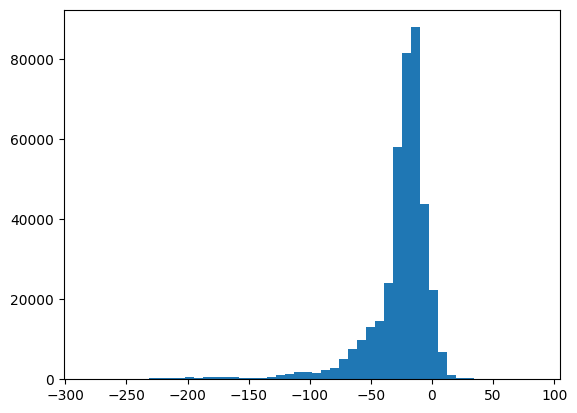

In [19]:
# amplitudes = analyzer_SMPL.get_extension("spike_amplitudes").get_data()
# plt.hist(amplitudes, bins=50)
# plt.show()

# amplitudes = analyzer_SC2.get_extension("spike_amplitudes").get_data()
# plt.hist(amplitudes, bins=50)

amplitudes = analyzer_KS4.get_extension("spike_amplitudes").get_data()
plt.hist(amplitudes, bins=50)

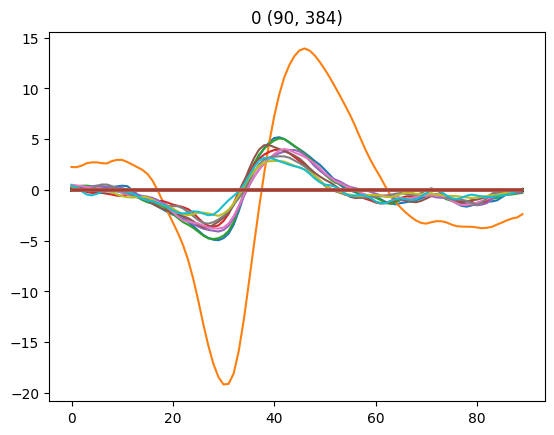

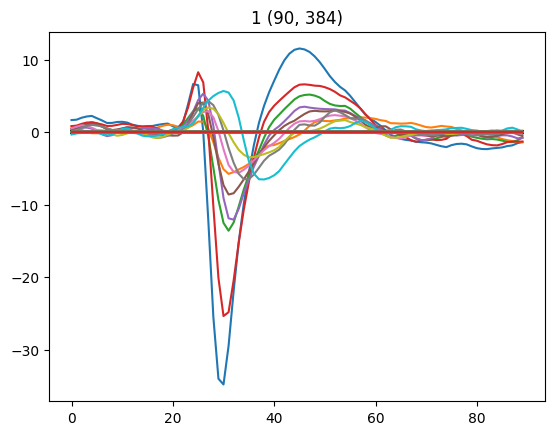

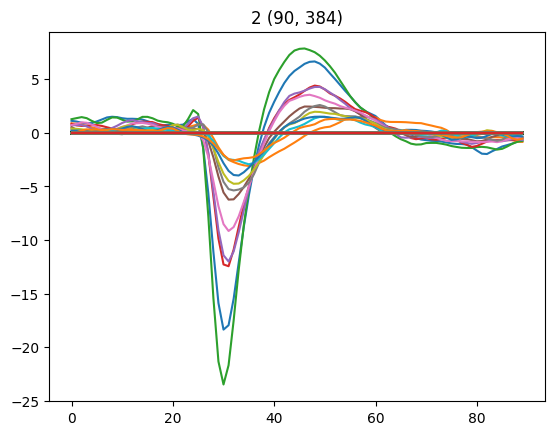

: 

In [ ]:
for unit_index, unit_id in enumerate(analyzer_KS4.unit_ids[:3]):
    fig, ax = plt.subplots()
    template = analyzer_KS4.get_extension("templates").get_data(operator="average")[unit_index]
    ax.plot(template)
    ax.set_title(f"{unit_id} {template.shape}")

In [20]:
# print(analyzer_SMPL.get_saved_extension_names())
# print(analyzer_SMPL.get_loaded_extension_names())
# print(analyzer_SC2.get_saved_extension_names())
# print(analyzer_SC2.get_loaded_extension_names())

['correlograms', 'noise_levels', 'random_spikes', 'spike_amplitudes', 'spike_locations', 'templates', 'template_similarity', 'unit_locations', 'waveforms']
['random_spikes', 'waveforms', 'noise_levels', 'templates', 'unit_locations', 'correlograms', 'template_similarity', 'spike_amplitudes', 'spike_locations']


In [ ]:
# analyzer_SMPL.delete_extension("spike_amplitudes")
# analyzer_SC2.delete_extension("spike_amplitudes")

In [21]:
# sorting_analyzer_path = './analyzer_SMPL_binary'
# analyzer_loaded = si.load_sorting_analyzer(sorting_analyzer_path)
# print(analyzer_loaded.get_loaded_extension_names())

# sorting_analyzer_path = './analyzer_SC2_binary'
# analyzer_loaded = si.load_sorting_analyzer(sorting_analyzer_path)
# print(analyzer_loaded.get_loaded_extension_names())

['correlograms', 'noise_levels', 'random_spikes', 'spike_amplitudes', 'spike_locations', 'templates', 'template_similarity', 'unit_locations', 'waveforms']


In [22]:
# analyzer_SMPL.compute("spike_amplitudes")
# analyzer_SC2.compute("spike_amplitudes")

spike_amplitudes (workers: 4 processes): 100%|██████████| 90/90 [00:00<00:00, 133.16it/s]


In [20]:
# qm_params = sqm.get_default_qm_params()
# pprint(qm_params)

qm_params = sqm.get_default_qm_params()
pprint(qm_params)

{'amplitude_cutoff': {'amplitudes_bins_min_ratio': 5,
                      'histogram_smoothing_value': 3,
                      'num_histogram_bins': 100,
                      'peak_sign': 'neg'},
 'amplitude_cv': {'amplitude_extension': 'spike_amplitudes',
                  'average_num_spikes_per_bin': 50,
                  'min_num_bins': 10,
                  'percentiles': (5, 95)},
 'amplitude_median': {'peak_sign': 'neg'},
 'd_prime': {},
 'drift': {'direction': 'y',
           'interval_s': 60,
           'min_num_bins': 2,
           'min_spikes_per_interval': 100},
 'firing_range': {'bin_size_s': 5, 'percentiles': (5, 95)},
 'firing_rate': {},
 'isi_violation': {'isi_threshold_ms': 1.5, 'min_isi_ms': 0},
 'isolation_distance': {},
 'l_ratio': {},
 'nearest_neighbor': {'max_spikes': 10000, 'n_neighbors': 5},
 'nn_isolation': {'max_spikes': 10000,
                  'min_fr': 0.0,
                  'min_spikes': 10,
                  'n_components': 10,
                  'n_n

In [21]:
qm_params["presence_ratio"]["bin_duration_s"] = 1
qm_params["amplitude_cutoff"]["num_histogram_bins"] = 5
qm_params["drift"]["interval_s"] = 2
qm_params["drift"]["min_spikes_per_interval"] = 2

In [22]:
# analyzer_SMPL.compute("quality_metrics", qm_params)
# analyzer_SMPL.get_extension("quality_metrics").get_data()
# analyzer_SC2.compute("quality_metrics", qm_params)
# analyzer_SC2.get_extension("quality_metrics").get_data()
analyzer_KS4.compute("quality_metrics", qm_params)
analyzer_KS4.get_extension("quality_metrics").get_data()

c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\qualitymetrics\misc_metrics.py:1066: UserWarning: Some units have too few spikes : amplitude_cutoff is set to NaN
  warnings.warn(f"Some units have too few spikes : amplitude_cutoff is set to NaN")
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,...,sync_spike_2,sync_spike_4,sync_spike_8,firing_range,drift_ptp,drift_std,drift_mad,sd_ratio,noise_cutoff,noise_ratio
0,2586,28.733333,1.0,2.535023,0.103179,23.0,0.069721,10.0,0.075,0.000645,...,0.192575,0.001160,0.0,15.19,NaN,NaN,NaN,0.803278,-0.232577,0.035427
1,243,2.700000,1.0,6.700487,0.000000,0.0,0.000000,0.0,0.180,NaN,...,0.168724,0.000000,0.0,2.79,NaN,NaN,NaN,1.261085,-0.211944,0.050420
2,2188,24.311111,1.0,4.657550,0.332126,53.0,0.298280,27.0,0.255,0.001708,...,0.147623,0.002742,0.0,12.57,NaN,NaN,NaN,1.405095,-0.510906,0.026757
3,2010,22.333333,1.0,1.424908,0.022277,3.0,0.022530,2.0,0.035,0.001702,...,0.139303,0.000498,0.0,5.24,NaN,NaN,NaN,1.113415,-0.333095,0.026393
4,1212,13.466667,1.0,2.054813,0.816913,40.0,0.548880,13.0,NaN,0.001554,...,0.263201,0.009901,0.0,23.29,NaN,NaN,NaN,1.500804,-0.360538,0.051816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,78,0.866667,1.0,5.173474,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.166667,0.000000,0.0,1.99,NaN,NaN,NaN,1.100974,-0.035727,0.041667
656,94,1.044444,1.0,11.538856,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.170213,0.000000,0.0,0.46,NaN,NaN,NaN,1.273318,-0.107990,0.014881
657,71,0.788889,1.0,8.917405,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.140845,0.000000,0.0,1.09,NaN,NaN,NaN,1.169546,-0.255031,0.022581
658,143,1.588889,1.0,5.602835,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.153846,0.000000,0.0,1.49,NaN,NaN,NaN,1.211629,-0.069625,0.032581


In [23]:
# sexp.export_to_phy(analyzer_SMPL, "phy_folder_for_SMPL", verbose=True)
# sexp.export_to_phy(analyzer_SC2, "phy_folder_for_SC2", verbose=True)
sexp.export_to_phy(analyzer_KS4, "phy_folder_for_KS4", verbose=True)

Fitting PCA:  44%|████▍     | 290/660 [20:11<25:45,  4.18s/it]


KeyboardInterrupt: 

In [29]:
# sorting_curated_phy = se.read_phy("phy_folder_for_SMPL", exclude_cluster_groups=["noise"])
# print(sorting_curated_phy)
sorting_curated_phy = se.read_phy("phy_folder_for_SC2", exclude_cluster_groups=["noise"])
print(sorting_curated_phy)

PhySortingExtractor: 495 units - 1 segments - 30.0kHz


In [30]:
# qm_data = analyzer_SMPL.get_extension("quality_metrics").get_data()
# keep_mask = (qm_data["snr"] > 10) & (qm_data["isi_violations_ratio"] < 0.01)
# print("Mask:", keep_mask.values)

# sorting_curated_auto = sorting_SMPL.select_units(sorting_SMPL.unit_ids[keep_mask])
# print(sorting_curated_auto)

qm_data = analyzer_SC2.get_extension("quality_metrics").get_data()
keep_mask = (qm_data["snr"] > 10) & (qm_data["isi_violations_ratio"] < 0.01)
print("Mask:", keep_mask.values)

sorting_curated_auto = sorting_SC2.select_units(sorting_SC2.unit_ids[keep_mask])
print(sorting_curated_auto)

Mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False  True
 False  True False False False False False False False  True False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False Fa

In [ ]:
comp_gt = sc.compare_sorter_to_ground_truth(gt_sorting=sorting_true, tested_sorting=sorting_TDC)
comp_pair = sc.compare_two_sorters(sorting1=sorting_TDC, sorting2=sorting_SC2)
comp_multi = sc.compare_multiple_sorters(
    sorting_list=[sorting_TDC, sorting_SC2, sorting_KS2], name_list=["tdc", "sc2", "ks2"]
)